In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pickle


In [395]:
tokens_for_model = pd.read_csv('tokensForModel.csv',sep=',')
tokens_for_model=tokens_for_model.loc[tokens_for_model['cluster']==2]
lsToken_for_model=tokens_for_model['symbol'].to_list()
lsToken_for_model

['FANTOM', 'FETCH_AI', 'FLOKI', 'GALA', 'THETA', 'XRP']

In [396]:
n_components = 1

In [397]:
time_steps = 100
n_future = 40

In [398]:
tokensCleaned  = pd.read_csv('tokensCleaned.csv',sep=';')
filter=tokensCleaned['symbol']==lsToken_for_model[-2]
tokenForModel=tokensCleaned[filter].copy()
tokenForModel.set_index('date',inplace=True)
tokenForModel.index = pd.to_datetime(tokenForModel.index)
tokenForModel.drop(['symbol'], axis=1, inplace=True)
tokenForModel.sort_index(inplace=True)
scaler = MinMaxScaler(feature_range=(0, 1))
pca = PCA(n_components=n_components)
tokenForModel_scaled = scaler.fit_transform(tokenForModel)
tokenForModel_scaled = pca.fit_transform(tokenForModel_scaled)
tokenForModel_scaled = pd.DataFrame(tokenForModel_scaled)
tokenForModel_scaled.index = tokenForModel.index
tokenForModel_scaled.columns = ['pca_%d' % i for i in range(n_components)]
tokenForModel_scaled.head()


,pca_0
date,
2018-01-17,-0.244415
2018-01-18,-0.241341
2018-01-19,-0.243251
2018-01-20,-0.242716
2018-01-21,-0.244168


In [400]:
model = pickle.load(open('./models/medium-model/model_trained.pkl', 'rb'))

In [403]:
time_steps = 100
n_future = 40
def predict_next_n_days(tokenForModel_scaled):
    n=tokenForModel_scaled.shape[0]+300
    initial_data = tokenForModel_scaled.values[:time_steps]
    for i in range(0,n,n_future):
        start = initial_data[i:i+time_steps+n_future]
        predictions=model.predict(start.reshape(1, time_steps, n_components))
        initial_data=np.append(initial_data,predictions.T)
    return initial_data

In [405]:
predicted_data=predict_next_n_days(tokenForModel_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

In [406]:
predicted_data_rebuild = predicted_data.reshape(-1, n_components)
predicted_data_rebuild = pca.inverse_transform(predicted_data_rebuild)
predicted_data_rebuild = scaler.inverse_transform(predicted_data_rebuild)
predicted_data_rebuild = pd.DataFrame(predicted_data_rebuild)
predicted_data_rebuild.columns = tokenForModel.columns
predicted_data_rebuild.index =pd.date_range(start=tokenForModel.index[0], periods=predicted_data_rebuild.shape[0])

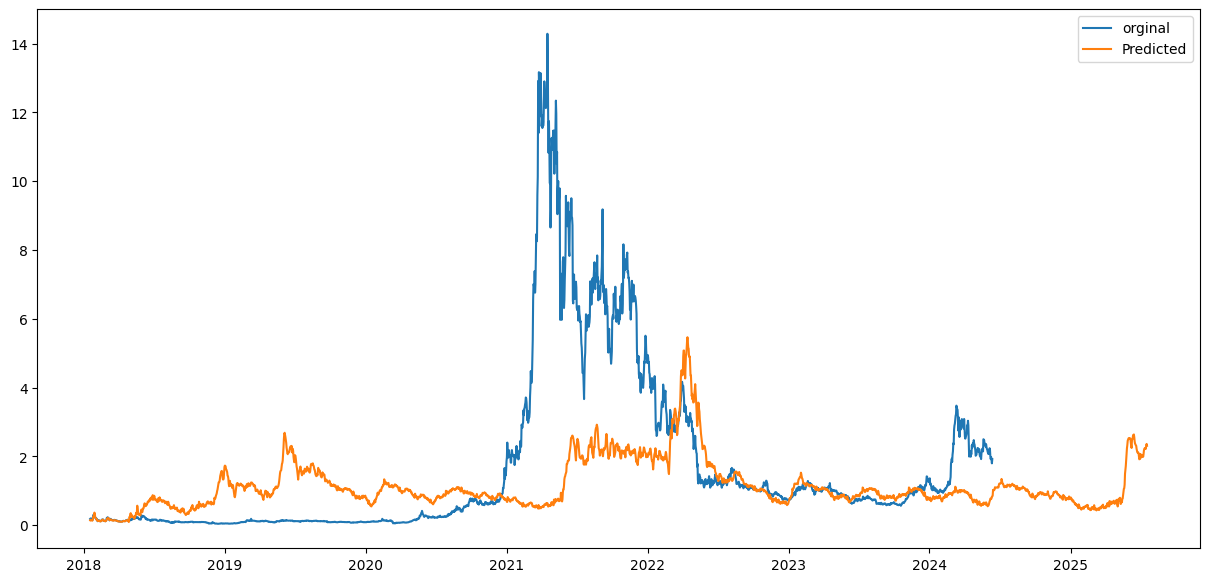

In [407]:
plt.figure(figsize=(15, 7))
plt.plot(tokenForModel['close'], label='orginal')
plt.plot(predicted_data_rebuild['close'], label='Predicted')
plt.legend()
plt.show()

In [408]:
max_clase_original = tokenForModel['close'].max()
print('Change close: ', max_clase_original)

Change close:  14.28287994


In [409]:
max_close = predicted_data_rebuild['close'].max()
print(f'change_maxPredict {max_close}')

change_maxPredict 5.462749950674662


In [410]:
error = abs(max_clase_original - max_close)
print("Error: ", error)

Error:  8.820129989325338


In [411]:
tokensCleaned  = pd.read_csv('tokensCleaned.csv',sep=';')
filter=tokensCleaned['symbol']==lsToken_for_model[-1]
tokenForModel=tokensCleaned[filter].copy()
tokenForModel.set_index('date',inplace=True)
tokenForModel.index = pd.to_datetime(tokenForModel.index)
tokenForModel.drop(['symbol'], axis=1, inplace=True)
tokenForModel.sort_index(inplace=True)
scaler = MinMaxScaler(feature_range=(0, 1))
pca = PCA(n_components=n_components)
tokenForModel_scaled = scaler.fit_transform(tokenForModel)
tokenForModel_scaled = pca.fit_transform(tokenForModel_scaled)
tokenForModel_scaled = pd.DataFrame(tokenForModel_scaled)
tokenForModel_scaled.index = tokenForModel.index
tokenForModel_scaled.columns = ['pca_%d' % i for i in range(n_components)]
tokenForModel_scaled.head()

,pca_0
date,
2015-06-15,-0.271286
2015-06-16,-0.270863
2015-06-17,-0.270544
2015-06-18,-0.270283
2015-06-19,-0.269767


In [412]:
predicted_data=predict_next_n_days(tokenForModel_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

In [413]:
predicted_data_rebuild = predicted_data.reshape(-1, n_components)
predicted_data_rebuild = pca.inverse_transform(predicted_data_rebuild)
predicted_data_rebuild = scaler.inverse_transform(predicted_data_rebuild)
predicted_data_rebuild = pd.DataFrame(predicted_data_rebuild)
predicted_data_rebuild.columns = tokenForModel.columns
predicted_data_rebuild.index =pd.date_range(start=tokenForModel.index[0], periods=predicted_data_rebuild.shape[0])

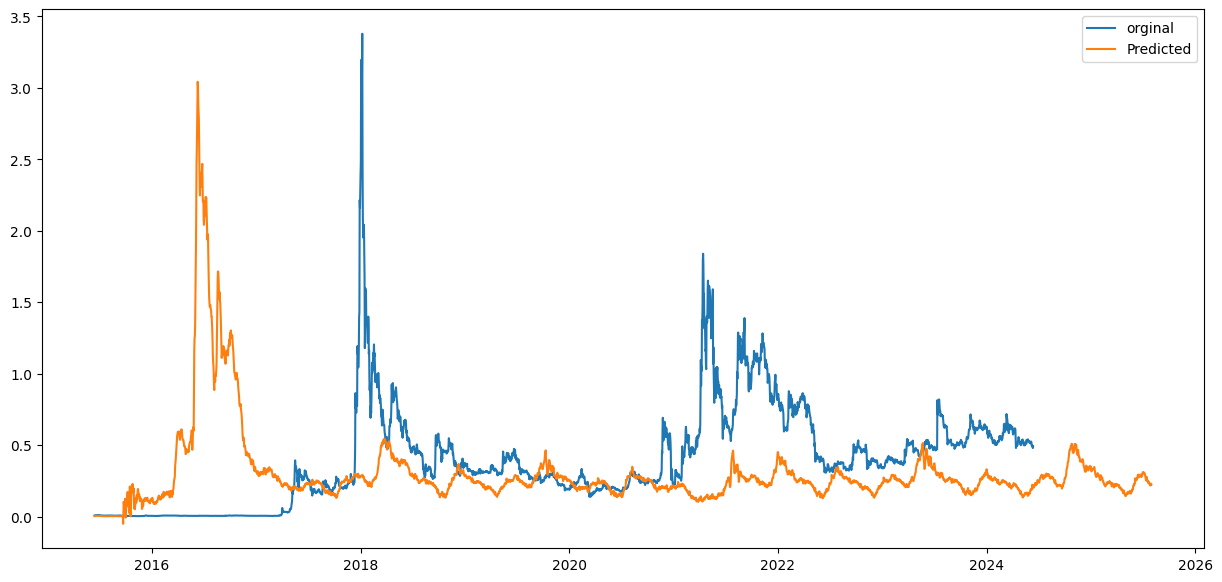

In [414]:
plt.figure(figsize=(15, 7))
plt.plot(tokenForModel['close'], label='orginal')
plt.plot(predicted_data_rebuild['close'], label='Predicted')
plt.legend()
plt.show()

In [415]:
max_clase_original = tokenForModel['close'].max()
print('Change close: ', max_clase_original)

Change close:  3.3778100014


In [416]:

max_close = predicted_data_rebuild['close'].max()
print(f'change_maxPredict {max_close}')

change_maxPredict 3.042168123732738


In [417]:
error = abs(max_clase_original - max_close)
print("Error: ", error)

Error:  0.33564187766726183
